<a href="https://colab.research.google.com/github/inepicone/Practice/blob/main/Image_Classifier_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Basic operation labaries:
import numpy              as np
import pandas             as pd

# ML
import  tensorflow as     tf
from    tensorflow import keras

# visualization:
import matplotlib.pyplot as plt

Uso la bd MNIST de prueba de keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# lets see the size and the dtype:

print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


SO we have 60000 images of 28x28 all int8 NOT FLOAT

Note that the dataset is already split into a training set and a test set, but there is no
validation set, so let’s create one. Moreover, since we are going to train the neural net‐
work using Gradient Descent, we must scale the input features. For simplicity, we just
scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also
converts them to floats)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [7]:
print('X_valid.shape: ', X_valid.shape)
print('X_valid.dtype: ', X_valid.dtype)
print('X_train.shape: ', X_train.shape)
print('X_train.dtype: ', X_train.dtype)
print('y_valid.shape: ', y_valid.shape)
print('y_valid.dtype: ', y_valid.dtype)
print('y_train.shape: ', y_train.shape)
print('y_train.dtype: ', y_train.dtype)

X_valid.shape:  (5000, 28, 28)
X_valid.dtype:  float64
X_train.shape:  (55000, 28, 28)
X_train.dtype:  float64
y_valid.shape:  (5000,)
y_valid.dtype:  uint8
y_train.shape:  (55000,)
y_train.dtype:  uint8


In [25]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot", "Skirt"]


In [26]:
# Now let’s build the neural network! Here is a classification MLP with two hidden layers:
# 1) we call/create the model:
model = keras.models.Sequential()

# 2) Next, we build the first layer and add it to the model. It is a Flatten layer whose
# role is simply to convert each input image into a 1D array: if it receives input data
# X, it computes X.reshape(-1, 1). 
# This layer does not have any parameters, it is just there to do some simple preprocessing. 
# Since it is the first layer in the model, we should specify the input_shape: 
# this does not include the batch size, only the shape of the instances. 
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 3) and 4) Next we add a Dense hidden layer with 300 neurons. 
# It will use the ReLU activation function. 
# Each Dense layer manages its own weight matrix, containing all the
# connection weights between the neurons and their inputs. It also manages a 
# vector of bias terms (one per neuron). When it receives some input data, it computes
# •Next we add a second Dense hidden layer with 100 neurons, also using the ReLU
# activation function.

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# 5)Finally, we add a Dense output layer with 11 neurons (one per class), using the
# softmax activation function (because the classes are exclusive).
model.add(keras.layers.Dense(11, activation="softmax"))

In [28]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(11, activation="softmax")
])


In [30]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 11)                1111      
                                                                 
Total params: 266,711
Trainable params: 266,711
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers


In [42]:
name_1 = model.layers[1].name
print(name_1)

dense_6


In [36]:
model.get_layer('dense_6').name


'dense_6'

All the parameters of a layer can be accessed using its get_weights() and
set_weights() method.

In [47]:
# weights, biases = model.get_weights()
# print( weights)
# print(weights.shape)
# print(biases)
# print(biases.shape)

Compiling the Model

After a model is created, we must call its compile() method to specify the loss func‐
tion and the optimizer to use. Optionally, we can also specify a list of extra metrics to
compute during training and evaluation:


In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

First, we use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. 

If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead. 

If we were doing binary classi‐
fication (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

Regarding the optimizer, "sgd" simply means that we will train the model
using simple Stochastic Gradient Descent.

# Training and Evaluating the Model
Now the model is ready to be trained. 

For this we simply need to call its fit() method. 

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). 

We also pass a validation set (this is optional): Keras will measure the loss and the extra metrics on this set at the
end of each epoch, which is very useful to see how well the model really performs: 

  -if the performance on the training set is much better than on the validation set, our model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set):


In [50]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7201 - accuracy: 0.7637 - val_loss: 0.5521 - val_accuracy: 0.8128
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4856 - accuracy: 0.8308 - val_loss: 0.4508 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4407 - accuracy: 0.8455 - val_loss: 0.4122 - val_accuracy: 0.8624
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4128 - accuracy: 0.8548 - val_loss: 0.4438 - val_accuracy: 0.8348
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8612 - val_loss: 0.4260 - val_accuracy: 0.8580
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8665 - val_loss: 0.3813 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3637 - accuracy: 0.8713 - val_loss: 0.3726 - val_accuracy:

A little trick: Instead of passing a validation set using the validation_data argument, we could instead set validation_split to the ratio of the training set that you want Keras to use for validation (e.g., 0.1).


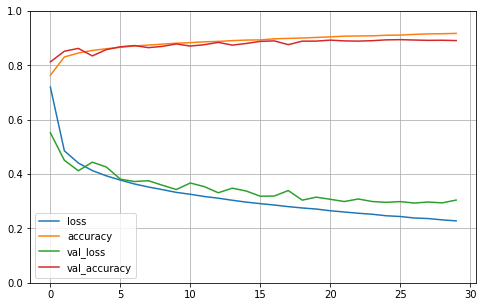

In [53]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

We can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. SUPER! 

Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting. 



# Using the Model to Make Predictions

Next, we can use the model’s predict() method to make predictions on new instances.

In [54]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)